In [3]:
#question 1
#create odd() function
#takes argument 'n' and returns list of odd numbers
#from [0..n] inclusive
def odd(n):
    nums = list(range(n+1)) #take range from 0 to n+1 (+1 so its inclusive)
    odds = [n for n in nums if n%2!=0] #only take odd numbers
    return odds


print("returning odd numbers from 0 to 10")
print(odd(10))
print("\nreturning odd numbers from 0 to 5")
print(odd(5))

returning odd numbers from 0 to 10
[1, 3, 5, 7, 9]

returning odd numbers from 0 to 5
[1, 3, 5]


In [386]:
#question 2, a and b
#read students.csv file
#sort and return list by name, age

import csv #for reading csv files

#append each row of csv file to students
students = []
with open('students.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        students.append({'name': row[0], 'age': row[1], 'major': row[2]}) #add to list from csv file

#sort using name as key
def name(e):
    return e['name']

#sort using age as key
def age(e):
    return e['age']

students.sort(key=name)
print('a. sorting by name')
for row in students:
    print(row)
print('\n')

students.sort(key=age)
print('b. sorting by age')
for row in students:
    print(row)
print('\n')


a. sorting by name
{'name': 'Daniel', 'age': '21', 'major': 'MECH'}
{'name': 'Joe', 'age': '22', 'major': 'BIOE'}
{'name': 'Mike', 'age': '22', 'major': 'COEN'}
{'name': 'Pedro', 'age': '22', 'major': 'AMTH'}
{'name': 'Ryan', 'age': '19', 'major': 'ELEN'}


b. sorting by age
{'name': 'Ryan', 'age': '19', 'major': 'ELEN'}
{'name': 'Daniel', 'age': '21', 'major': 'MECH'}
{'name': 'Joe', 'age': '22', 'major': 'BIOE'}
{'name': 'Mike', 'age': '22', 'major': 'COEN'}
{'name': 'Pedro', 'age': '22', 'major': 'AMTH'}




In [387]:
#question 3
#define function to count character appearances in string
#return most frequent character
#runs in O(N)
#uses dictionary

def countCharacters(sen):
    table = {}
    max = 0
    maxLetter = ""     #keep track of most used letter
    for letter in sen:    #iterate through sentence
        if letter in table:
            table[letter] += 1
        else:
            table[letter] = 1  #increment dictionary value, or place letter in dictionary if not alread ypresent
        
        if (table[letter] > max and letter.isalpha()): #update most used letter, ignoring " " character
            max = table[letter]
            maxLetter = letter
    
    print(table)
    print(sen)
    print('max letter is', maxLetter, 'with', max, 'entries\n')
    

#test phrases
sen1 = "hello world"
countCharacters(sen1)
sen2 = "the quick brown fox jumped over the lazy dog"
countCharacters(sen2)

{'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1}
hello world
max letter is l with 3 entries

{'t': 2, 'h': 2, 'e': 4, ' ': 8, 'q': 1, 'u': 2, 'i': 1, 'c': 1, 'k': 1, 'b': 1, 'r': 2, 'o': 4, 'w': 1, 'n': 1, 'f': 1, 'x': 1, 'j': 1, 'm': 1, 'p': 1, 'd': 2, 'v': 1, 'l': 1, 'a': 1, 'z': 1, 'y': 1, 'g': 1}
the quick brown fox jumped over the lazy dog
max letter is e with 4 entries



In [388]:
#question 4
#redo question 2
#read students.csv file
#sort and return list by name, age
#use pandas dataframes

import pandas as pd
import csv

data = {
    "name": [],
    "age": [],
    "major": [] #set to append to
}
with open('students.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data["name"].append(row[0])
        data["age"].append(row[1])
        data["major"].append(row[2]) #append to each set based on csv file

frame = pd.DataFrame(data) #place data in data frame provided by pandas

print("sorting by name")
frame.sort_values(by=["name"], inplace=True)
print(frame)

print("\nsorting by age")
frame.sort_values(by=["age"], inplace=True)
print(frame)


sorting by name
     name age major
2  Daniel  21  MECH
4     Joe  22  BIOE
1    Mike  22  COEN
0   Pedro  22  AMTH
3    Ryan  19  ELEN

sorting by age
     name age major
3    Ryan  19  ELEN
2  Daniel  21  MECH
4     Joe  22  BIOE
1    Mike  22  COEN
0   Pedro  22  AMTH


In [269]:
#question 5
#use NumPy to create two 100x100 arrays
#add them together in two different ways
#method 1: double for loop

import numpy as np

#create two distinct 100x100 arrays
buf = np.array(range(10000))
buf2 = np.array(range(10000))
tdarrayA = np.ndarray(shape=(100,100), dtype=int, buffer=buf, order='C')
tdarrayB = np.ndarray(shape=(100,100), dtype=int, buffer=buf2, order='F')

print("method 1: double for loop")
for col in range(100):
    for row in range(100):
        tdarrayA[col, row] += tdarrayB[col, row] #iterate through each index and add together
print(tdarrayA)


method 1: double for loop
[[    0   101   202 ...  9797  9898  9999]
 [  101   202   303 ...  9898  9999 10100]
 [  202   303   404 ...  9999 10100 10201]
 ...
 [ 9797  9898  9999 ... 19594 19695 19796]
 [ 9898  9999 10100 ... 19695 19796 19897]
 [ 9999 10100 10201 ... 19796 19897 19998]]


In [389]:
#question 5
#use NumPy to create two 100x100 arrays
#method 2: '+' operator
#time how long each method takes, using "time" module

#method 2: +
import numpy as np

#create two distinct 100x100 arrays
buf = np.array(range(10000))
buf2 = np.array(range(10000))
tdarrayA = np.ndarray(shape=(100,100), dtype=int, buffer=buf, order='C')
tdarrayB = np.ndarray(shape=(100,100), dtype=int, buffer=buf2, order='F')

#use + operator to add the two arrays
print("\nmethod 2: '+' operator")
print(tdarrayA + tdarrayB)


method 2: '+' operator
[[    0   101   202 ...  9797  9898  9999]
 [  101   202   303 ...  9898  9999 10100]
 [  202   303   404 ...  9999 10100 10201]
 ...
 [ 9797  9898  9999 ... 19594 19695 19796]
 [ 9898  9999 10100 ... 19695 19796 19897]
 [ 9999 10100 10201 ... 19796 19897 19998]]


method 1: double for loop
1000 entries in timeList

2.556192636489868ms average runtime
0.09655214958490049ms standard deviation


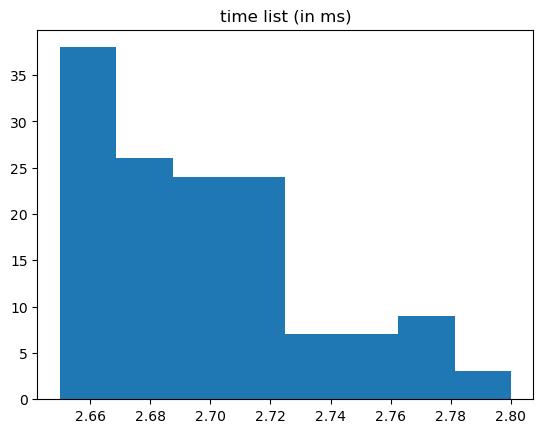

In [390]:
#question 6
#time each method 1000 times, record in vector length 1000
#method 1: double for loop

import numpy as np
import time

def compute():
    buf = np.array(range(10000))
    buf2 = np.array(range(10000))
    tdarrayA = np.ndarray(shape=(100,100), dtype=int, buffer=buf, order='C')
    tdarrayB = np.ndarray(shape=(100,100), dtype=int, buffer=buf2, order='F')

    start = time.time() #start measuring time
    for col in range(100):
        for row in range(100):
            tdarrayA[col, row] += tdarrayB[col, row]
    end = time.time()
    return (end-start) #end measuring time and return total time spent on the function


timeList = np.array([])
for num in range(1000):
        timeList = np.append(timeList, [compute()*1000]) #measure time taken 1000 times and append to the timeList vector

#print(timeList, '\n')
print("method 1: double for loop")
print(timeList.size, 'entries in timeList\n')
print(np.average(timeList), '\bms average runtime') #calculate average runtime and standard deviation
print(np.std(timeList), '\bms standard deviation')

plt.hist(timeList, bins=8, range=(2.65,2.8)) #create histograph to display data
plt.title("time list (in ms)")
plt.show()




method 2: '+' operator
1000 entries in timeList

2.530261278152466ms average runtime
0.08187437714939845ms standard deviation


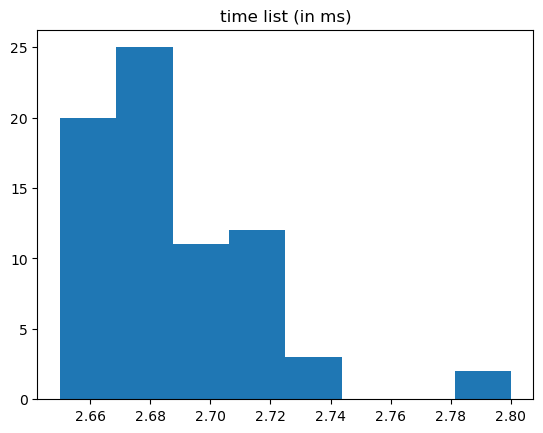

In [392]:
#question 6
#time each method 1000 times, record in vector length 1000
#method 2: double for loop

import numpy as np
import time
import matplotlib.pyplot as plt

def compute():
    buf = np.array(range(10000))
    buf2 = np.array(range(10000))
    tdarrayA = np.ndarray(shape=(100,100), dtype=int, buffer=buf, order='C')
    tdarrayB = np.ndarray(shape=(100,100), dtype=int, buffer=buf2, order='F')

    start = time.time() #start measuring time
    for col in range(100):
        for row in range(100):
            tdarrayA[col, row] += tdarrayB[col, row]
    end = time.time()
    return (end-start) #end measuring time and return total time spent on the function


timeList = np.array([])
for num in range(1000):
        timeList = np.append(timeList, [compute()*1000]) #measure time taken 1000 times and append to the timeList vector

#print(timeList, '\n')
print("\nmethod 2: '+' operator")
print(timeList.size, 'entries in timeList\n')
print(np.average(timeList), '\bms average runtime') #calculate average runtime and standard deviation
print(np.std(timeList), '\bms standard deviation')

plt.hist(timeList, bins=8, range=(2.65,2.8)) #create histograph to display data
plt.title("time list (in ms)")
plt.show()


     name age major
0   Pedro  22  AMTH
1    Mike  22  COEN
2  Daniel  21  MECH
3    Ryan  19  ELEN
4     Joe  22  BIOE


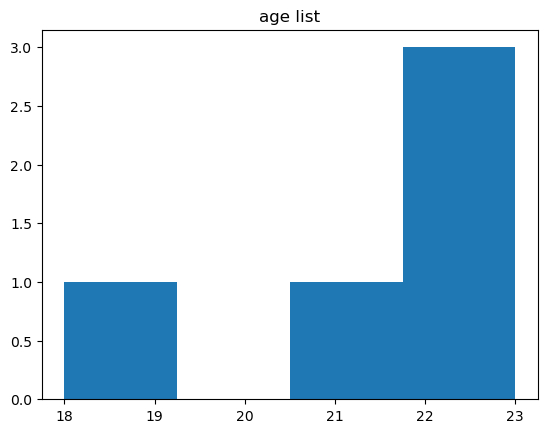

In [391]:
#question 7
#small example program of own choosing
#this program will take the students.csv file from before
#and plot a histogram for the average age of all of the students

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

data = {
    "name": [],
    "age": [],
    "major": []
}
with open('students.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data["name"].append(row[0]) #add data to set based on csv file
        data["age"].append(row[1])
        data["major"].append(row[2])
        #print(data["name"])

frame = pd.DataFrame(data)
print(frame) #put data into frame

ageList = np.array([0])
for num in data["age"]:
    number = int(num)
    ageList = np.append(ageList, number)

#print('\n', ageList)

plt.hist(ageList, bins=4, range=(18, 23)) #plot histogram to show age demographic of students
plt.title("age list")
plt.show()
    